In [18]:
# Import necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

# Load dataset (replace with actual dataset file)
data = pd.read_csv('Salary_dataset.csv') # Example dataset 
print("Dataset Preview:")
print(data.head())

# Split dataset into features and target 
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target labels 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
# Predict and evaluate 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
loss = 1 - accuracy
# Print results
print(f"Accuracy: {accuracy:.2f}") 
print(f"Loss: {loss:.2f}")
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:")
print(conf_matrix)


Dataset Preview:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
Accuracy: 0.00
Loss: 1.00
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


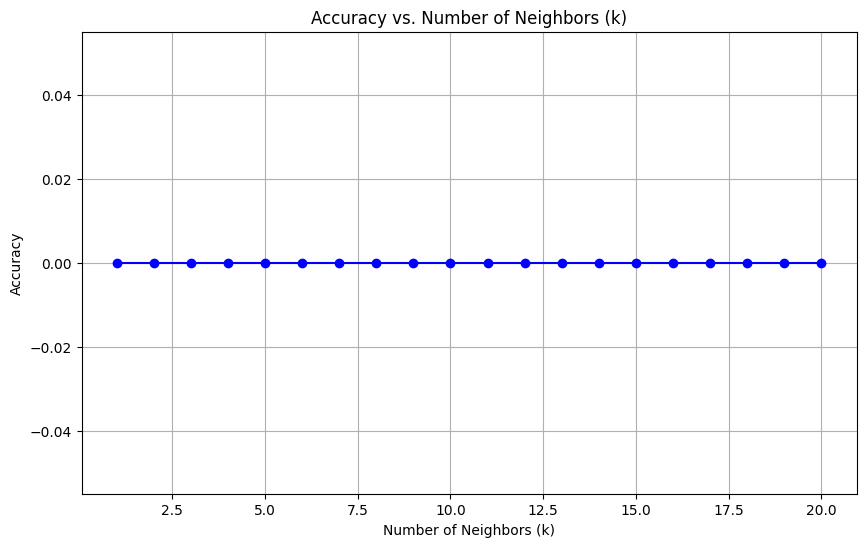

Optimal k: 1, Accuracy: 0.00


In [2]:
# Import necessary libraries 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
# Experiment with different k values
k_values = range(1, 21)
accuracies = [] 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) 
    accuracies.append(accuracy_score(y_test, y_pred))
# Plot accuracy vs. k 
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='b') 
plt.title("Accuracy vs. Number of Neighbors (k)") 
plt.xlabel("Number of Neighbors (k)") 
plt.ylabel("Accuracy")
plt.grid() 
plt.show()

# Display optimal k
optimal_k = k_values[accuracies.index(max(accuracies))] 
print(f"Optimal k: {optimal_k}, Accuracy: {max(accuracies):.2f}")


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
Selected Features: [ True  True]
Feature Ranking: [1 1]
Accuracy after Feature Selection: 0.00
Confusion Matrix after Feature Selection:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
Feature Rankings:
            Feature  Ranking
0       Unnamed: 0        1
1  YearsExperience        1


D:\PY Projects\CIFAR10_Adversarial\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(


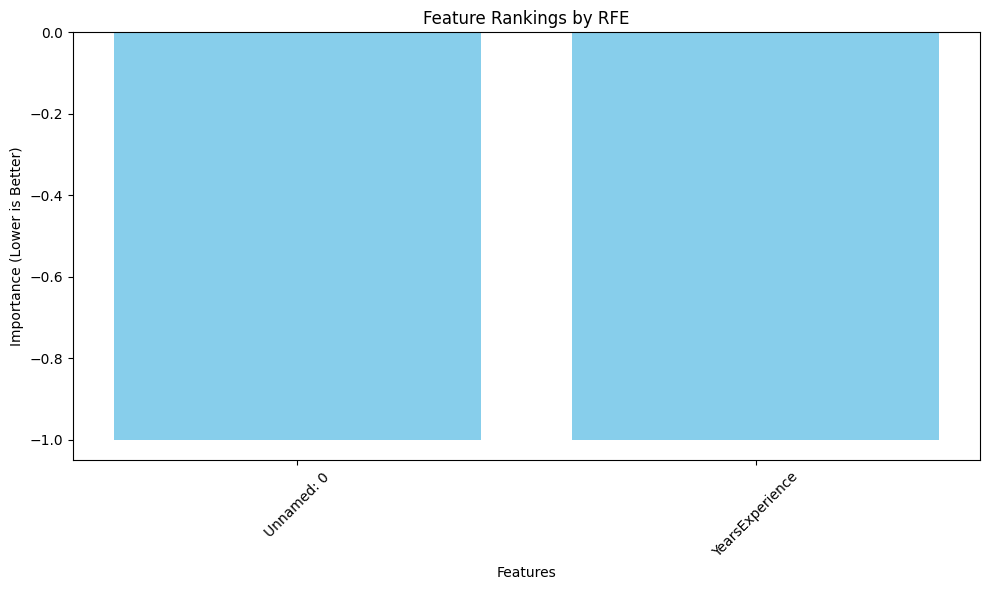

In [3]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace with your dataset file)
data = pd.read_csv('Salary_dataset.csv') # Example dataset print("Dataset Preview:")
print(data.head())

# Split dataset into features and target 
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target labels # Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Standardize the feature data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=knn, n_features_to_select=5) # Select top 5 features 
rfe.fit(X_train, y_train)

# Print selected features
print("Selected Features:", rfe.support_) 
print("Feature Ranking:", rfe.ranking_)

# Train KNN using only selected features 
X_train_selected = rfe.transform(X_train) 
X_test_selected = rfe.transform(X_test) 
knn.fit(X_train_selected, y_train) 
y_pred_selected = knn.predict(X_test_selected)

# Evaluate performance after feature selection 
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)

# Display results
print(f"Accuracy after Feature Selection: {accuracy_selected:.2f}") 
print("Confusion Matrix after Feature Selection:") 
print(conf_matrix_selected)

# Visualize Feature Importance 
feature_names = data.columns[:-1]
ranking = pd.DataFrame({"Feature": feature_names, "Ranking": rfe.ranking_}).sort_values(by="Ranking")
print("Feature Rankings:\n", ranking) 

plt.figure(figsize=(10, 6))
plt.bar(ranking["Feature"], -ranking["Ranking"], color='skyblue') 
plt.title("Feature Rankings by RFE")
plt.ylabel("Importance (Lower is Better)") 
plt.xlabel("Features") 
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('healthcare_dataset.csv')
print("Columns in dataset:", data.columns)

# Target column
target = "Medical Condition"   # choose your target

# Encode categorical features (e.g., Gender, Blood Type, etc.)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Features and labels
X = data.drop(columns=[target])
y = data[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without standardization
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_without_standardization = accuracy_score(y_test, y_pred)

# With standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_with_standardization = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without standardization:", accuracy_without_standardization)
print("Accuracy with standardization:", accuracy_with_standardization)


Columns in dataset: Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')
Accuracy without standardization: 0.1981081081081081
Accuracy with standardization: 0.19963963963963963


Optimal value of k: 1
Maximum accuracy: 0.4288


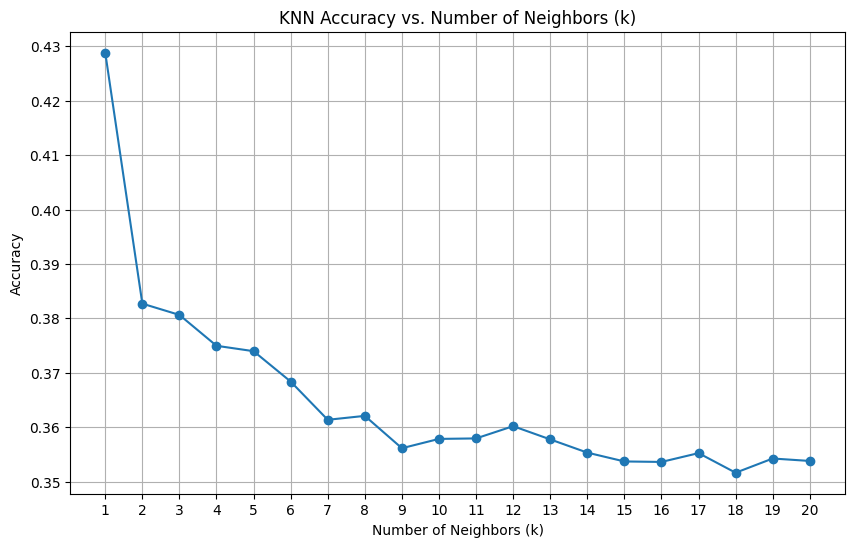

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('healthcare_dataset.csv')

# Define target
target = 'Admission Type'

# Drop ID-like columns (not useful for prediction)
drop_cols = ['Name', 'Doctor', 'Hospital', 'Discharge Date']
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

# Encode categorical features
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object' and col != target:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Encode target if needed
if data[target].dtype == 'object':
    y = LabelEncoder().fit_transform(data[target].astype(str))
else:
    y = data[target]

X = data.drop(columns=[target])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]

print(f'Optimal value of k: {optimal_k}')
print(f'Maximum accuracy: {max(accuracy_scores):.4f}')

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("Salary_dataset.csv")

# Identify target column (change if your dataset uses a different name)
target = "Salary"

# Drop ID-like columns if they exist
drop_cols = [col for col in ['id'] if col in data.columns]
X = data.drop(columns=drop_cols + [target])
y = data[target]

# Encode categorical features if present
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different distance metrics
distance_metrics = ["euclidean", "manhattan", "minkowski"]
results = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

print("Accuracy with different distance metrics:")
for metric, acc in results.items():
    print(f"{metric}: {acc:.4f}")


Accuracy with different distance metrics:
euclidean: 0.0000
manhattan: 0.0000
minkowski: 0.0000
